Anomalieerkennung in Finanzmarktdaten

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
import Builder

%matplotlib inline

In [68]:
sns.set_style('whitegrid')
sns.set_context('notebook',font_scale=1)

In [69]:
data = Builder.buildMertonDF()

In [70]:
data

,Merton Jump,Jumps plot,Jumps,Return log,RV,BPV,Diff,Anomaly Returns IF,Anomaly RV IF,Anomaly Diff IF
2,0.992503,0.0,1,0.007043,0.000169,0.000127,0.000042,1,1,1
3,0.991942,0.0,1,-0.000566,0.000050,0.000014,0.000035,1,1,1
4,1.001130,0.0,1,0.009220,0.000085,0.000025,0.000061,1,1,1
5,0.999984,0.0,1,-0.001145,0.000086,0.000048,0.000038,1,1,1
6,1.017512,0.0,1,0.017377,0.000303,0.000586,-0.000282,1,1,1
...,...,...,...,...,...,...,...,...,...,...
994,0.692208,0.0,1,-0.008574,0.000074,0.000209,-0.000135,1,1,1
995,0.702704,0.0,1,0.015049,0.000300,0.000259,0.000041,1,1,1
996,0.704387,0.0,1,0.002392,0.000232,0.000086,0.000146,1,1,1
997,0.698850,0.0,1,-0.007891,0.000068,0.000112,-0.000044,1,1,1


In [71]:
subset = data.loc[(data['Jumps']==-1) | (data['Anomaly RV IF']==-1)]
subset[['Jumps', 'Anomaly RV IF']]

,Jumps,Anomaly RV IF
10,1,-1
11,1,-1
14,1,-1
21,1,-1
22,1,-1
...,...,...
961,1,-1
963,1,-1
964,1,-1
977,1,-1


In [72]:
f1_score(subset['Jumps'],subset['Anomaly RV IF'])

0.0

In [73]:
# plots

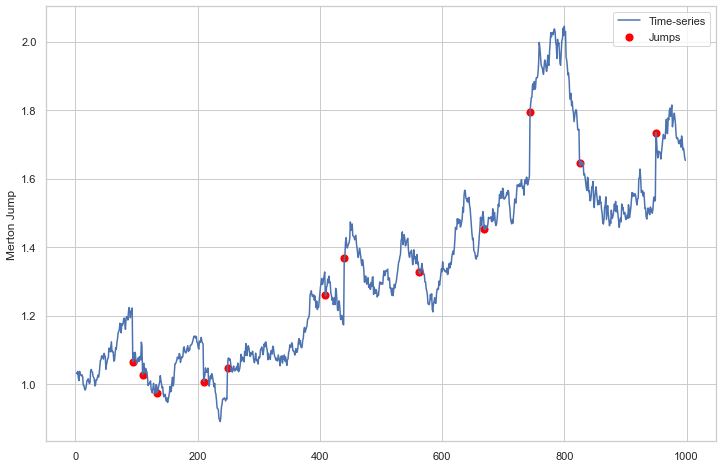

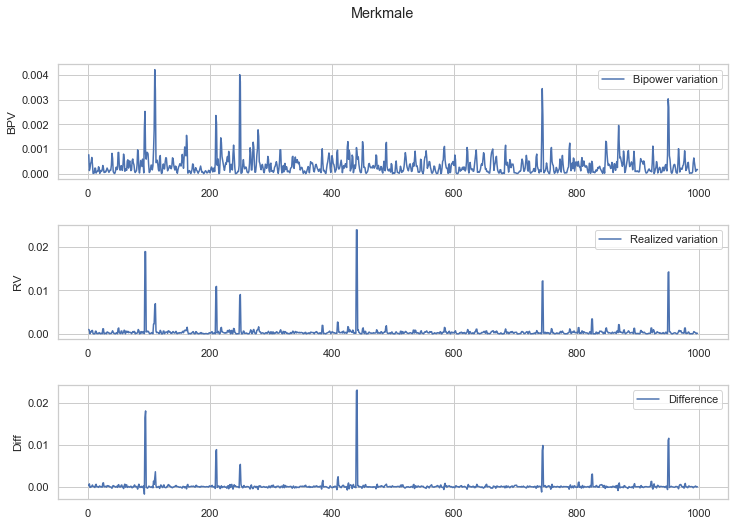

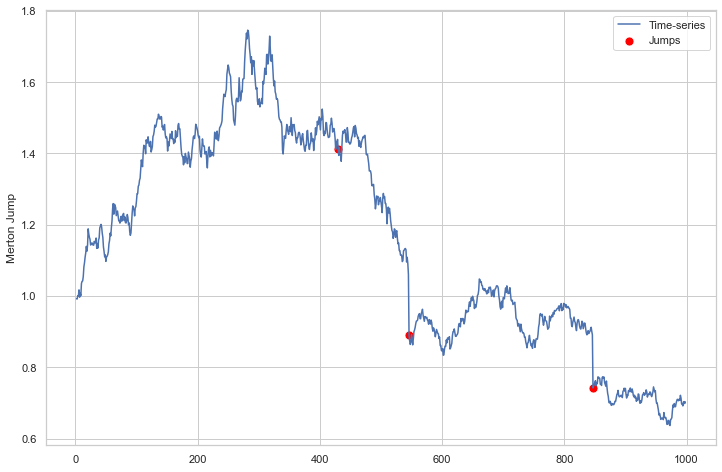

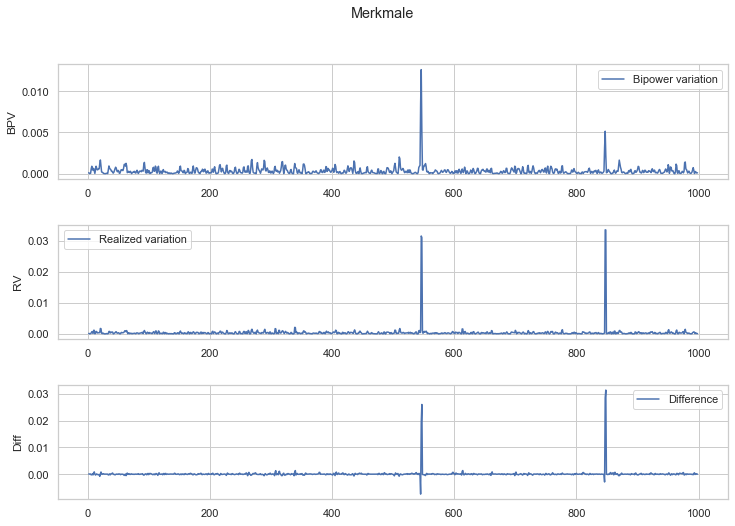

In [74]:
Builder.plotter(data)